In [14]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %seaborn inline

#  Import and read the charity_data.csv.
import pandas as pd 
fire_df = pd.read_csv("Data/California_Fire_Incidents.csv")
fire_df[fire_df["CountyIds"] == '6,11,17,23']["Name"]

1054    Ranch Fire (Mendocino Complex)
1055    Ranch Fire (Mendocino Complex)
1056    Ranch Fire (Mendocino Complex)
1057    Ranch Fire (Mendocino Complex)
Name: Name, dtype: object

In [15]:
fire_df = fire_df.drop(["Active", 
"AdminUnit", 
"AirTankers",
"CanonicalUrl", 
"ConditionStatement", 
"ControlStatement",
"Extinguished",
"Fatalities",
"Featured",
"Final",
"FuelType",
"Injuries",
"Location",
# "Name",
"PercentContained",
"Public",
"SearchDescription",
"SearchKeywords",
"Status",
"StructuresDamaged",
"StructuresDestroyed",
"StructuresEvacuated",
"StructuresThreatened",
"UniqueId",
"Updated"
], axis=1)
fire_df.head()

,AcresBurned,ArchiveYear,CalFireIncident,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Helicopters,Latitude,Longitude,MajorIncident,Name,PersonnelInvolved,Started,WaterTenders
0,257314.0,2013,True,Tuolumne,55,NaN,NaN,NaN,NaN,37.857000,-120.086000,False,Rim Fire,NaN,2013-08-17T15:25:00Z,NaN
1,30274.0,2013,True,Los Angeles,19,NaN,NaN,NaN,NaN,34.585595,-118.423176,False,Powerhouse Fire,NaN,2013-05-30T15:28:00Z,NaN
2,27531.0,2013,True,Riverside,33,NaN,NaN,NaN,NaN,33.709500,-116.728850,False,Mountain Fire,NaN,2013-07-15T13:43:00Z,NaN
3,27440.0,2013,False,Placer,31,NaN,NaN,NaN,NaN,39.120000,-120.650000,False,American Fire,NaN,2013-08-10T16:30:00Z,NaN
4,24251.0,2013,True,Ventura,56,47.0,8.0,117.0,11.0,0.000000,0.000000,True,Springs Fire,2167.0,2013-05-02T07:01:00Z,11.0


In [16]:
# LOOK AT UNDECIDED COUNTIES
[(column, fire_df[column].nunique()) for column in fire_df]

[('AcresBurned', 634),
 ('ArchiveYear', 7),
 ('CalFireIncident', 2),
 ('Counties', 59),
 ('CountyIds', 79),
 ('CrewsInvolved', 40),
 ('Dozers', 24),
 ('Engines', 54),
 ('Helicopters', 17),
 ('Latitude', 1441),
 ('Longitude', 1448),
 ('MajorIncident', 2),
 ('Name', 1193),
 ('PersonnelInvolved', 151),
 ('Started', 1597),
 ('WaterTenders', 24)]

In [17]:
[(column, fire_df[column].unique()) for column in fire_df[["Counties","CountyIds"]]]

[('Counties',
  array(['Tuolumne', 'Los Angeles', 'Riverside', 'Placer', 'Ventura',
         'Fresno', 'Siskiyou', 'Humboldt', 'Tehama', 'Shasta', 'San Diego',
         'Kern', 'Sonoma', 'Contra Costa', 'Butte', 'Tulare',
         'Santa Barbara', 'Mariposa', 'Monterey', 'El Dorado',
         'San Bernardino', 'Plumas', 'Modoc', 'San Luis Obispo', 'Madera',
         'Inyo', 'Napa', 'San Benito', 'San Joaquin', 'Lake', 'Alameda',
         'Glenn', 'Yolo', 'Sacramento', 'Stanislaus', 'Solano', 'Merced',
         'Mendocino', 'Lassen', 'Amador', 'Yuba', 'Nevada', 'Santa Clara',
         'Calaveras', 'San Mateo', 'Orange', 'Colusa', 'Trinity',
         'Del Norte', 'Mono', 'Alpine', 'Sutter', 'Kings', 'Sierra',
         'Santa Cruz', 'Marin', 'Mexico', 'State of Oregon',
         'State of Nevada'], dtype=object)),
 ('CountyIds',
  array(['55', '19', '33', '31', '56', '10', '47', '12', '52', '45', '37',
         '15,56', '49', '7', '4', '54', '42', '22', '33,', '27', '15', '9',
         '3

In [18]:
fire_df[fire_df["CountyIds"] == '6,11,17,23']

,AcresBurned,ArchiveYear,CalFireIncident,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Helicopters,Latitude,Longitude,MajorIncident,Name,PersonnelInvolved,Started,WaterTenders
1054,410203.0,2018,True,Colusa,"6,11,17,23",NaN,NaN,NaN,NaN,39.243283,-123.103367,True,Ranch Fire (Mendocino Complex),NaN,2018-07-27T12:05:00Z,NaN
1055,410203.0,2018,True,Glenn,"6,11,17,23",NaN,NaN,NaN,NaN,39.243283,-123.103367,True,Ranch Fire (Mendocino Complex),NaN,2018-07-27T12:05:00Z,NaN
1056,410203.0,2018,True,Lake,"6,11,17,23",NaN,NaN,NaN,NaN,39.243283,-123.103367,True,Ranch Fire (Mendocino Complex),NaN,2018-07-27T12:05:00Z,NaN
1057,410203.0,2018,True,Mendocino,"6,11,17,23",NaN,NaN,NaN,NaN,39.243283,-123.103367,True,Ranch Fire (Mendocino Complex),NaN,2018-07-27T12:05:00Z,NaN


In [19]:
fire_df[fire_df["CountyIds"] == '6']

,AcresBurned,ArchiveYear,CalFireIncident,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Helicopters,Latitude,Longitude,MajorIncident,Name,PersonnelInvolved,Started,WaterTenders
841,70.0,2017,True,Colusa,6,4.0,4.0,10.0,2.0,39.012240,-122.201270,True,Sand Fire,76.0,2017-07-17T13:17:00Z,3.0
1218,75.0,2018,True,Colusa,6,NaN,NaN,NaN,NaN,39.297600,-122.512012,True,Stony Fire,NaN,2018-07-04T13:14:00Z,NaN
1599,20.0,2019,True,Colusa,6,1.0,2.0,7.0,1.0,39.088333,-122.309167,True,Spring Fire,65.0,2019-08-14T12:52:00Z,2.0


In [20]:
env_df = pd.read_csv("Data/all_env_conditions.csv")

In [21]:
env_df = env_df.drop(["Target", "CIMIS Region"], axis=1)
env_df.head()

,Stn Id,Stn Name,Date,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F)
0,2,FivePoints,1/1/2018,0.06,0.00,219.0,7.3,63.4,35.3,47.8,82.0,46.0,65.0,36.6,3.3,78.3,51.1
1,2,FivePoints,1/2/2018,0.04,0.00,127.0,7.4,59.8,37.7,47.2,80.0,52.0,67.0,36.7,3.1,74.5,51.3
2,2,FivePoints,1/3/2018,0.04,0.00,125.0,8.4,61.1,37.3,49.9,79.0,49.0,68.0,39.9,4.5,107.5,51.3
3,2,FivePoints,1/4/2018,0.07,0.01,219.0,11.6,69.2,48.7,56.8,94.0,52.0,74.0,48.5,5.8,140.2,53.0
4,2,FivePoints,1/5/2018,0.07,0.00,239.0,12.7,73.8,47.5,59.8,94.0,49.0,72.0,50.8,4.2,101.4,54.4


In [22]:
electric_df = pd.read_csv("Data/ElectricityByCounty CALIFORNIA Usage in Millions of kWh.csv")

In [23]:
electric_df = electric_df.drop(["Sector"], axis=1)
electric_df.head()

,County,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1998,1997,1996,1995,1994,1993,1992,1991,1990,Total Usage
0,ALAMEDA,7619.304491,7445.556909,8087.656147,7873.882100,7341.708151,7408.645462,7634.447579,7592.708714,7955.624590,...,7193.581963,7823.244481,7769.025061,7309.930938,6668.237122,7260.776432,6822.523242,6809.573768,7109.299895,227816.910170
1,ALAMEDA,3064.781376,2945.804917,2991.794416,2917.342741,2893.676837,2891.232325,2984.213677,2998.246885,3023.830340,...,2791.331196,2674.834394,2615.308775,2548.457958,2774.566317,2529.229286,2465.000074,2515.209970,2498.265626,85479.891344
2,ALAMEDA,10684.085867,10391.361826,11079.450563,10791.224841,10235.384987,10299.877787,10618.661255,10590.955599,10979.454929,...,9984.913160,10498.078875,10384.333836,9858.388895,9442.803439,9790.005719,9287.523316,9324.783738,9607.565521,313296.801509
3,ALPINE,8.774426,9.283298,9.025215,8.124741,4.354396,4.008389,4.752038,4.590161,5.199864,...,4.832369,4.468048,4.384382,4.296693,4.382027,4.485710,4.224083,3.906455,3.581764,179.750573
4,ALPINE,10.131788,9.420910,9.951697,9.290913,11.855504,11.974975,13.424431,9.298178,9.093424,...,6.792005,6.373298,6.063832,6.231561,6.183168,6.812776,5.808735,6.165242,6.036978,254.017846


In [24]:
housing_df = pd.read_csv("Data/housing.csv")

In [25]:
housing_df = housing_df.drop(["housing_median_age", "total_rooms","total_bedrooms"], axis=1)
housing_df.head()

,longitude,latitude,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,565.0,259.0,3.8462,342200.0,NEAR BAY


In [26]:
def boxplot_it(df, column_number):
    print("THERE ARE {} NUMERICAL COLUMNS IN THIS DF AVAILABLE".format( len(df.select_dtypes(include='number').columns)) )
    number_df = pd.DataFrame(df.select_dtypes(include='number').iloc[:,column_number])
    [plt.boxplot(x=number_df[column].dropna(), labels=[column]) for column in number_df]

THERE ARE 10 NUMERICAL COLUMNS IN THIS DF AVAILABLE


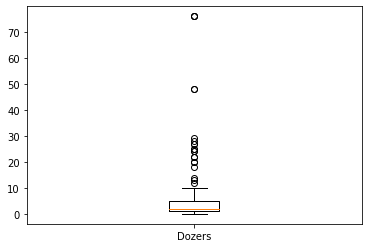

In [39]:
boxplot_it(fire_df, 3)
